# Step 0 - Import Libraries

#### ONLY RUN THIS CELL ONCE

In [ ]:
pip install -q -r requirements.txt

#### Libraries

In [3]:
#Importing all libraries
import pandas as pd
%pylab inline
import seaborn as sns
from scipy.stats import pearsonr

import geopandas
import folium
from folium.plugins import HeatMap
import sys

import import_ipynb

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Step 0.1 - Import dataset here 🖍️

In [4]:
path = "data.csv"
data = pd.DataFrame()

if path.endswith('.csv'):
    data = pd.read_csv(path)

elif path.endswith('.xlsx') or path.endswith('.xls'):
    data = pd.read_excel(path)

elif path.endswith('.txt'):
    data = pd.read_csv(path, sep='*', encoding='latin')

else:
    print(f"Unsupported file format. Please provide a .csv or .xlsx file")
    
if data is not None:
    print(f"Dataframe {path} loaded successfully! 👍")

Dataframe data.csv loaded successfully! 👍


In [5]:
datac = data.copy()

# Step 1 - Data Frame Observation

### 1.1 - Dataframe type

In [6]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    1000 non-null   int64  
 1   EmailsSent    1000 non-null   int64  
 2   EmailsOpened  1000 non-null   int64  
 3   LinksClicked  1000 non-null   int64  
 4   Purchases     1000 non-null   int64  
 5   Age           1000 non-null   int64  
 6   Revenue       1000 non-null   float64
 7   Occupation    1000 non-null   object 
 8   OptOut        1000 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 70.4+ KB


In [7]:
datac.head()

,CustomerID,EmailsSent,EmailsOpened,LinksClicked,Purchases,Age,Revenue,Occupation,OptOut
0,1,164,37,37,33,41,29862.04,Data scientist,0
1,2,106,105,35,16,76,28462.99,Business Analyst,0
2,3,121,40,34,37,63,91094.19,Data scientist,0
3,4,56,12,12,41,55,28706.89,Business Analyst,0
4,5,168,145,22,23,27,30835.22,Business Analyst,0


In [9]:
import pandas as pd
import numpy as np

# Dictionary to map the first letter to the complete data type name
data_type_mapping = {
    'i': 'int',
    'int': 'int',
    'f': 'float',
    'float': 'float',
    's': 'string',
    'string': 'string',
    'k': 'keep',
    'keep': 'keep',
    '': 'keep'
}

for column in datac.columns:
    print(f"🔵 Converting '{column}' column of type '{datac[column].dtype}' ...")
    
    # Print the first three values of the column on separate lines
    first_three_values = datac[column].head(3).tolist()

    print(f"\n ▪️ First three values:")
    for value in first_three_values:
        print(f"   * '{value}'")

    # Prompt the user for the desired data type
    data_type_input = input(f" ❔ Enter the desired data type for '{column}' (int / float / string / keep (don't convert)): ").strip().lower()
    
    # Get the complete data type name from the mapping
    data_type = data_type_mapping.get(data_type_input)
    
    if data_type:
        
        # Check if 'keep' option is selected
        if data_type == 'keep':
            print(f" ➡️ '{column}' column will not be converted.")
        
        # Convert to INT
        elif data_type == 'int':
            if datac[column].dtype == object:  # Check if the column contains string data
                datac[column] = pd.to_numeric(datac[column].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')
            datac[column] = datac[column].round().apply(lambda x: int(x) if not pd.isna(x) else np.nan)
        
        # Convert to FLOAT
        elif data_type == 'float':
            if datac[column].dtype == object:  # Check if the column contains string data
                datac[column] = pd.to_numeric(datac[column].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')
            datac[column] = datac[column].round().astype(float)  # Always round for 'float'

        # Convert to STRING
        elif data_type == 'string':
            datac[column] = datac[column].astype(str)
        
    else:
        print(f" ❗️ Unsupported data type '{data_type_input}'. Skipping conversion for '{column}'.")
    
    # Check if there are NaN values after conversion
    if datac[column].isna().any():
        print(f" ⚠️ Warning: NaN values found in '{column}' after conversion.")
    
    print(f"\n ✅ '{column}' column converted to {data_type}.\n\n")

# Display the modified DataFrame
print("Modified DataFrame:")
print(datac)

🔵 Converting 'CustomerID' column of type 'int64' ...

 ▪️ First three values:
   * '1'
   * '2'
   * '3'
 ❔ Enter the desired data type for 'CustomerID' (int / float / string / keep (don't convert)): 
 ➡️ 'CustomerID' column will not be converted.

 ✅ 'CustomerID' column converted to keep.


🔵 Converting 'EmailsSent' column of type 'int64' ...

 ▪️ First three values:
   * '164'
   * '106'
   * '121'
 ❔ Enter the desired data type for 'EmailsSent' (int / float / string / keep (don't convert)): 
 ➡️ 'EmailsSent' column will not be converted.

 ✅ 'EmailsSent' column converted to keep.


🔵 Converting 'EmailsOpened' column of type 'int64' ...

 ▪️ First three values:
   * '37'
   * '105'
   * '40'
 ❔ Enter the desired data type for 'EmailsOpened' (int / float / string / keep (don't convert)): 
 ➡️ 'EmailsOpened' column will not be converted.

 ✅ 'EmailsOpened' column converted to keep.


🔵 Converting 'LinksClicked' column of type 'int64' ...

 ▪️ First three values:
   * '37'
   * '35'
   


### 1.2 - Describe numerical features

In [10]:
datac.describe(percentiles=[.01, .25, .5, .75, .99])

,CustomerID,EmailsSent,EmailsOpened,LinksClicked,Purchases,Age,Revenue,OptOut
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,127.360000,73.12900,46.971000,27.719000,47.908000,52728.544100,0.001000
std,288.819436,42.877744,36.21049,27.481801,10.408668,18.122803,27614.048548,0.031623
min,1.000000,50.000000,10.00000,5.000000,1.000000,18.000000,5001.110000,0.000000
1%,10.990000,52.000000,11.00000,6.000000,4.000000,18.000000,5841.039400,0.000000
25%,250.750000,92.000000,43.00000,23.000000,19.000000,32.000000,29828.342500,0.000000
50%,500.500000,126.500000,73.00000,44.000000,30.000000,48.000000,52558.325000,0.000000
75%,750.250000,164.250000,102.00000,67.000000,36.000000,64.000000,77114.832500,0.000000
99%,990.010000,198.010000,144.01000,111.010000,43.000000,79.000000,98491.190700,0.000000
max,1000.000000,199.000000,149.00000,118.000000,44.000000,79.000000,99792.980000,1.000000


### 1.3 - Describe categorical features

In [11]:
try:
    print(datac.describe(include='object'))
except ValueError:
    print("🟨 Warning! There are no categorical features in this DataSet!")

            Occupation
count             1000
unique               4
top     Data scientist
freq               257


### 1.4 - Features type consistency

In [12]:
# Initialize a dictionary to store type consistency results
type_consistency = {}

# Iterate through DataFrame columns
for column in datac:
    # Get the unique data types in the column
    unique_types = datac[column].apply(type).unique()
    
    # Check if there's more than one unique data type
    if len(unique_types) == 1:
        type_consistency[column] = f"🟢 {column}: Consistent ({unique_types[0].__name__})"
    else:
        type_consistency[column] = f"🔴 {column}: Inconsistent ({', '.join(t.__name__ for t in unique_types)})"

# Print the type consistency results for each feature
for consistency in type_consistency.values():
    print(consistency)

🟢 CustomerID: Consistent (int)
🟢 EmailsSent: Consistent (int)
🟢 EmailsOpened: Consistent (int)
🟢 LinksClicked: Consistent (int)
🟢 Purchases: Consistent (int)
🟢 Age: Consistent (int)
🟢 Revenue: Consistent (float)
🟢 Occupation: Consistent (str)
🟢 OptOut: Consistent (int)


# Step 2 - Univariate Analysis

### 2.1 - Numerical Univariate Analysis

🔵 Feature : CustomerID

Central tendency measurement :
 * Mean:  500.5
 * Median:  500.5

Dispersion measurement :
 * Variance:  83333.25
 * Standard deviation:  288.6749902572095

Shape measurement :
 * Skewness:  0.0
 * Kurtosis:  -1.2

P1 and P99 :
 * P1:  10.99
 * P5:  50.95
 * P25:  250.75
 * P50:  500.5
 * P75:  750.25
 * P95:  950.05
 * P99:  990.01

Outlier test :
   No outliers detected.


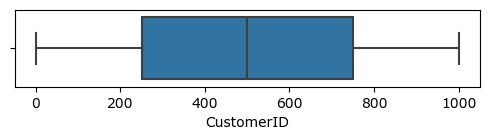

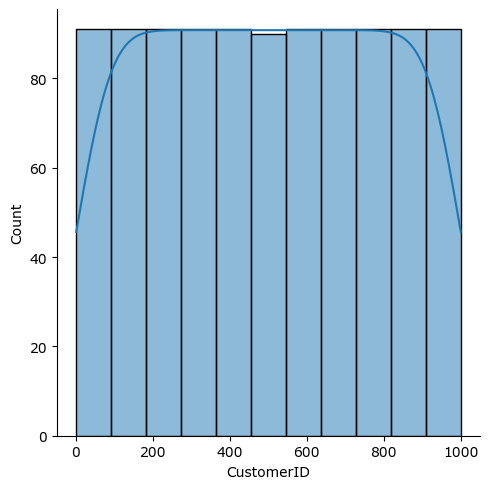

------------------------------





🔵 Feature : EmailsSent

Central tendency measurement :
 * Mean:  127.36
 * Median:  126.5

Dispersion measurement :
 * Variance:  1836.6624
 * Standard deviation:  42.856299420271924

Shape measurement :
 * Skewness:  -0.0321707513498764
 * Kurtosis:  -1.1824441493045241

P1 and P99 :
 * P1:  52.0
 * P5:  60.0
 * P25:  92.0
 * P50:  126.5
 * P75:  164.25
 * P95:  193.0
 * P99:  198.01

Outlier test :
   No outliers detected.


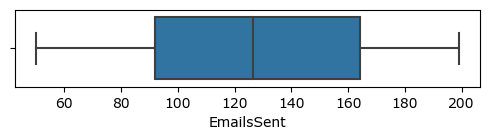

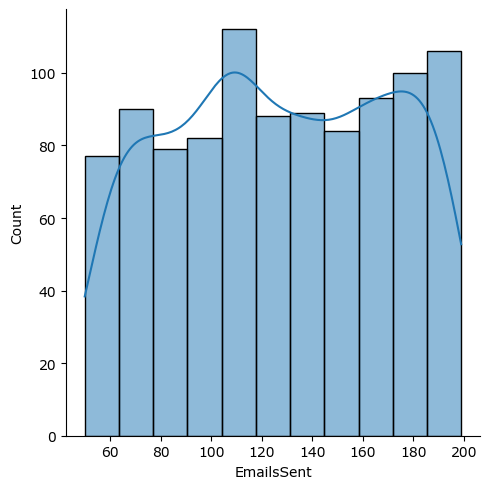

------------------------------





🔵 Feature : EmailsOpened

Central tendency measurement :
 * Mean:  73.129
 * Median:  73.0

Dispersion measurement :
 * Variance:  1309.888359
 * Standard deviation:  36.19237984714462

Shape measurement :
 * Skewness:  0.11357252781148988
 * Kurtosis:  -0.9834763876107435

P1 and P99 :
 * P1:  11.0
 * P5:  17.0
 * P25:  43.0
 * P50:  73.0
 * P75:  102.0
 * P95:  135.0
 * P99:  144.01

Outlier test :
   No outliers detected.


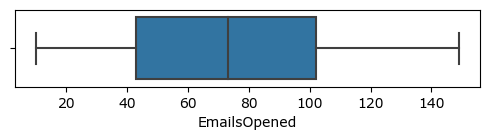

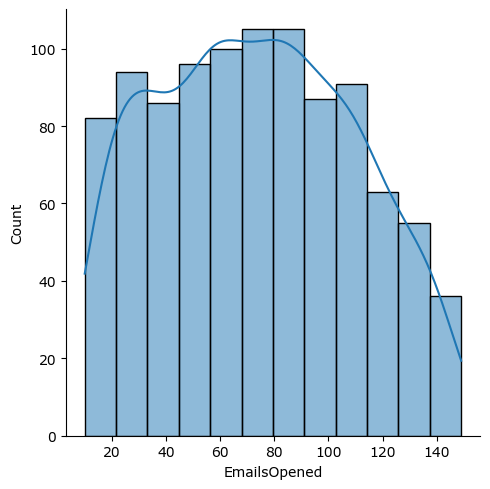

------------------------------





🔵 Feature : LinksClicked

Central tendency measurement :
 * Mean:  46.971
 * Median:  44.0

Dispersion measurement :
 * Variance:  754.494159
 * Standard deviation:  27.468057066345263

Shape measurement :
 * Skewness:  0.46839490879446516
 * Kurtosis:  -0.7310588592239595

P1 and P99 :
 * P1:  6.0
 * P5:  10.0
 * P25:  23.0
 * P50:  44.0
 * P75:  67.0
 * P95:  96.04999999999995
 * P99:  111.00999999999999

Outlier test :
   No outliers detected.


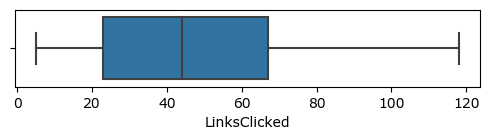

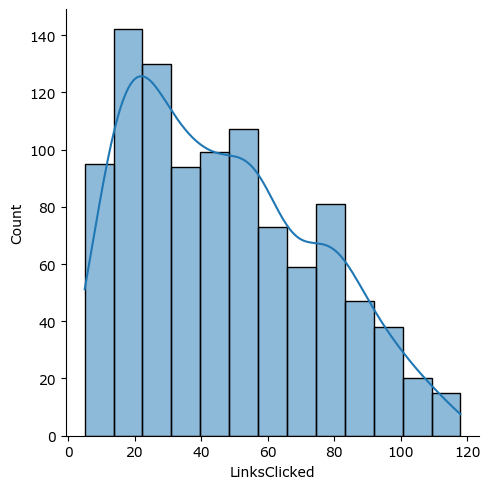

------------------------------





🔵 Feature : Purchases

Central tendency measurement :
 * Mean:  27.719
 * Median:  30.0

Dispersion measurement :
 * Variance:  108.232039
 * Standard deviation:  10.403462836959624

Shape measurement :
 * Skewness:  -0.45690116123429353
 * Kurtosis:  -0.8415020430371176

P1 and P99 :
 * P1:  4.0
 * P5:  9.0
 * P25:  19.0
 * P50:  30.0
 * P75:  36.0
 * P95:  42.0
 * P99:  43.0

Outlier test :
   No outliers detected.


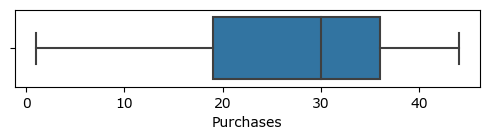

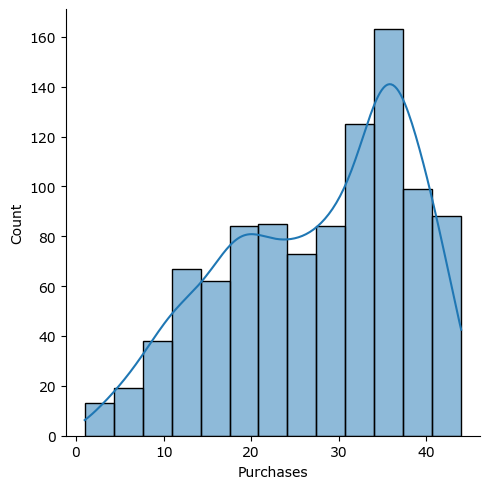

------------------------------





🔵 Feature : Age

Central tendency measurement :
 * Mean:  47.908
 * Median:  48.0

Dispersion measurement :
 * Variance:  328.107536
 * Standard deviation:  18.113738874125353

Shape measurement :
 * Skewness:  0.038146217654374585
 * Kurtosis:  -1.228574526544288

P1 and P99 :
 * P1:  18.0
 * P5:  20.0
 * P25:  32.0
 * P50:  48.0
 * P75:  64.0
 * P95:  76.0
 * P99:  79.0

Outlier test :
   No outliers detected.


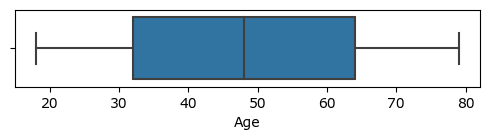

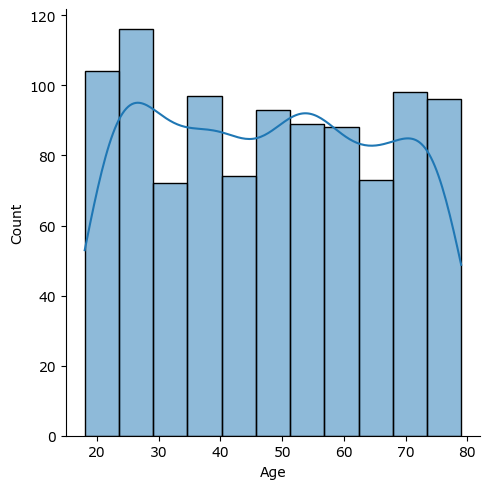

------------------------------





🔵 Feature : Revenue

Central tendency measurement :
 * Mean:  52728.5441
 * Median:  52558.325

Dispersion measurement :
 * Variance:  761773141.5245764
 * Standard deviation:  27600.238070070634

Shape measurement :
 * Skewness:  -0.02242381549734747
 * Kurtosis:  -1.1937777019910158

P1 and P99 :
 * P1:  5841.039400000001
 * P5:  9445.215
 * P25:  29828.3425
 * P50:  52558.325
 * P75:  77114.8325
 * P95:  95828.055
 * P99:  98491.19069999999

Outlier test :
   No outliers detected.


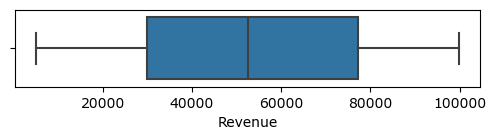

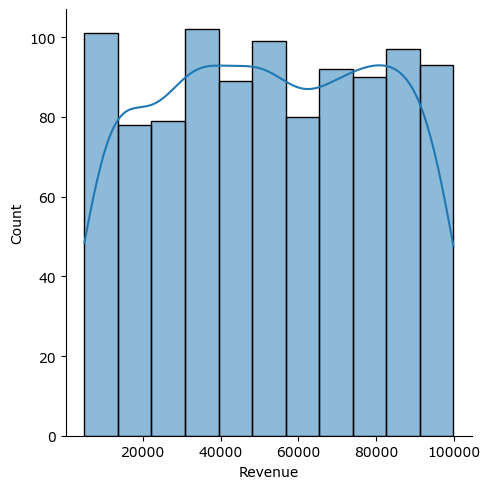

------------------------------





🔵 Feature : OptOut

Central tendency measurement :
 * Mean:  0.001
 * Median:  0.0

Dispersion measurement :
 * Variance:  0.000999
 * Standard deviation:  0.03160696125855822
🚨 Warning Standard deviation 3160.6961258558217 times bigger than mean

Shape measurement :
 * Skewness:  31.62277660168379
 * Kurtosis:  999.9999999999997

P1 and P99 :
 * P1:  0.0
 * P5:  0.0
 * P25:  0.0
 * P50:  0.0
 * P75:  0.0
 * P95:  0.0
 * P99:  0.0

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
    CustomerID  EmailsSent  EmailsOpened  LinksClicked  Purchases  Age  \
72          73          69            69            69          1   18   

     Revenue      Occupation  OptOut  
72  24463.72  Data scientist       1  



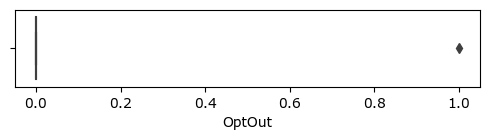

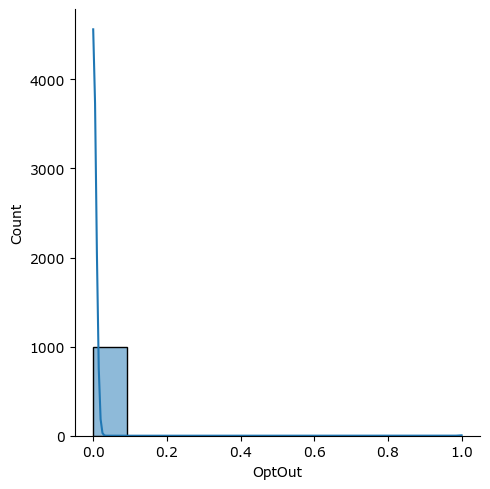

------------------------------





Finished! :D


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = datac.select_dtypes(include=np.number).columns

for c in numerical_features:
    print(f"🔵 Feature : {c}\n")
    
    # Central tendency measurement
    print("Central tendency measurement :")
    print(" * Mean: ", datac[c].mean())
    print(" * Median: ", datac[c].median())
    
    # Dispersion measurement
    print("\nDispersion measurement :")
    print(" * Variance: ", datac[c].var(ddof=0))
    print(" * Standard deviation: ", datac[c].std(ddof=0))
    
    if (datac[c].mean() * datac[c].std(ddof=0)) >= 0 and datac[c].std(ddof=0) >= datac[c].mean():
        print(f"🚨 Warning Standard deviation {datac[c].std(ddof=0) / datac[c].mean() * 100} times bigger than mean")
    
    # Shape measurement
    print("\nShape measurement :")
    print(" * Skewness: ", datac[c].skew())
    print(" * Kurtosis: ", datac[c].kurtosis())
    
    # P1 and P99
    Q1 = datac[c].quantile(0.25)
    Q3 = datac[c].quantile(0.75)
    print("\nP1 and P99 :")
    print(" * P1: ", datac[c].quantile(0.01))
    print(" * P5: ", datac[c].quantile(0.05))
    print(" * P25: ", Q1)
    print(" * P50: ", datac[c].quantile(0.50))
    print(" * P75: ", Q3)
    print(" * P95: ", datac[c].quantile(0.95))
    print(" * P99: ", datac[c].quantile(0.99))
    
    # Outlier test
    print("\nOutlier test :")
    IQR = Q3 - Q1
    
    high_outliers = datac[(datac[c] > Q3 + 1.5 * IQR)]
    low_outliers = datac[(datac[c] < Q1 - 1.5 * IQR)]
    
    if not high_outliers.empty or not low_outliers.empty:
        print("🚨 Warning Outliers detected:")
        if not high_outliers.empty:
            print(" * High outliers:")
            print(high_outliers)
        print()
        if not low_outliers.empty:
            print(" * Low outliers:")
            print(low_outliers)
    else:
        print("   No outliers detected.")
    
    # Box plot and distribution plot
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=c, data=datac)
    plt.xlabel(c)
    plt.show()
    sns.displot(x=c, data=datac, kde=True)
    plt.show()
    
    print("------------------------------\n\n\n\n\n")

print("Finished! :D")

### 2.2 - Categorical Univariate Analysis

🔵 Feature : Occupation



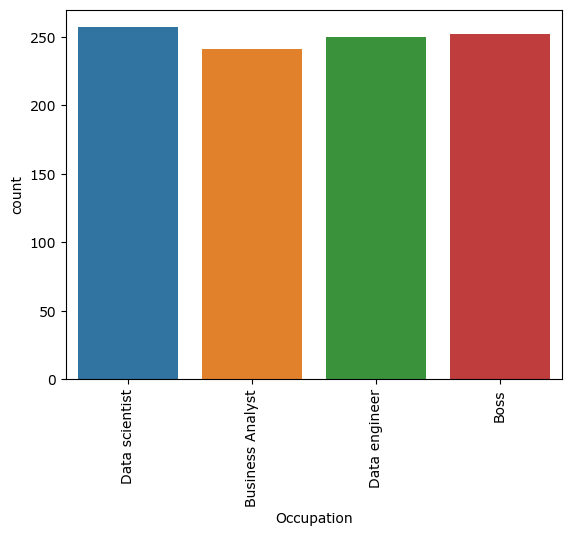

{'Data scientist': 257, 'Boss': 252, 'Data engineer': 250, 'Business Analyst': 241}

------------------------------





Finished! :D


In [11]:
categorical_features = datac.select_dtypes(include='object').columns

for c in categorical_features :
    sns.countplot(data=datac,x=c)
    plt.xticks(rotation=90)
    print(f"🔵 Feature : {c}\n")  
    plt.show()
    print(datac[c].value_counts().to_dict())
    print("\n------------------------------\n\n\n\n\n")

print("Finished! :D")

# Step 3 - Bivariate Analysis

### 3.1 - Numerical Bivariate Analysis

/private/var/mobile/Containers/Data/Application/A89F65F5-6C15-4318-86BD-7DB7449FE2DE/tmp/ipykernel_2699/123447534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = datac.corr()


Text(0.5, 1.0, 'Features correlation matrix')

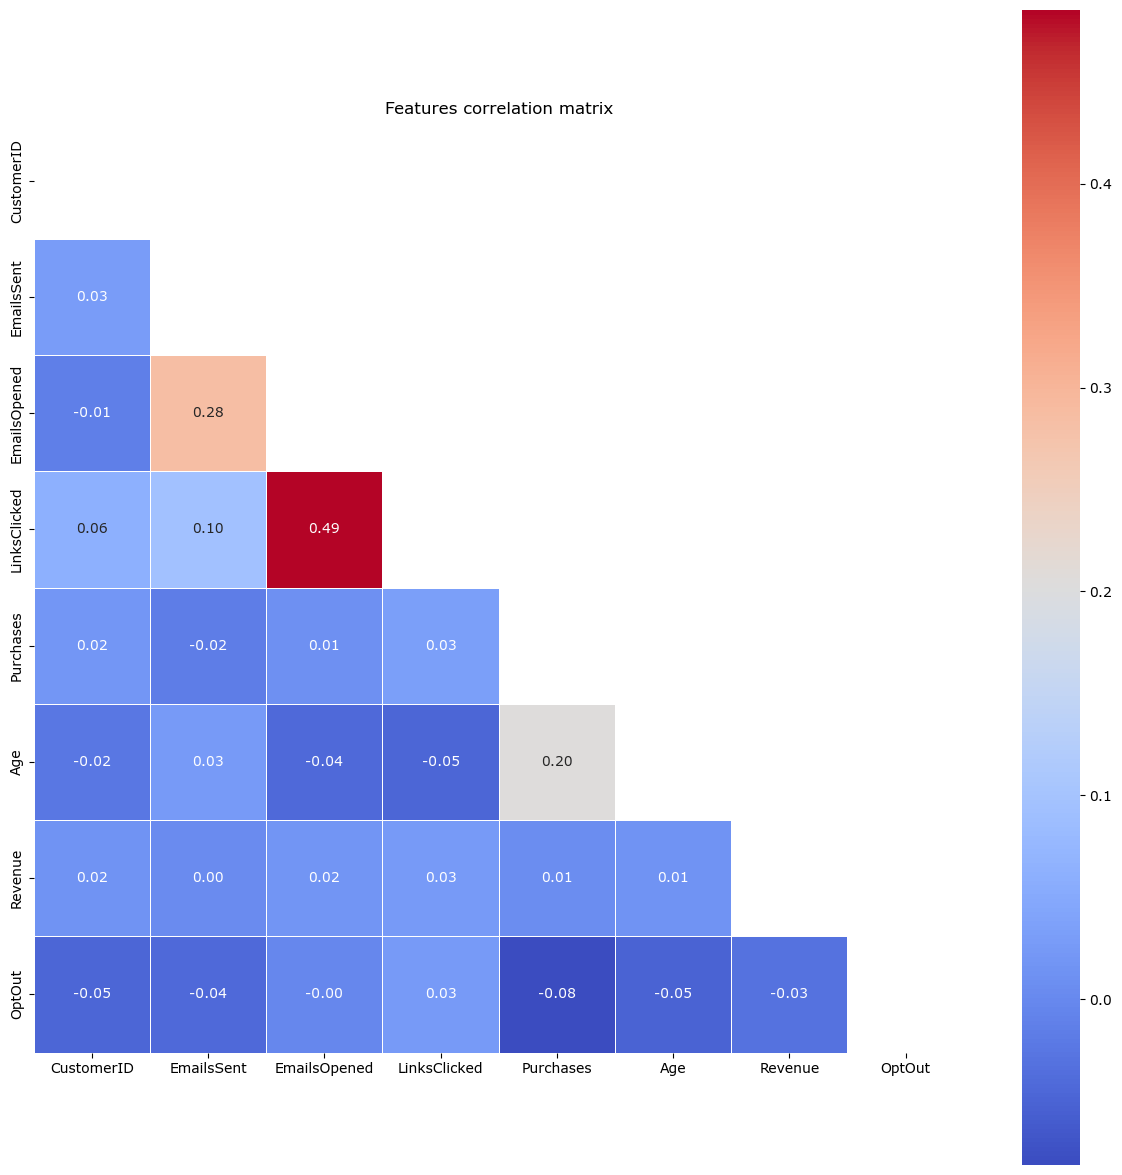

In [12]:
#Creating a correlation map between the numerical features
corr_matrix = datac.corr()
mask = np.triu(corr_matrix)
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='coolwarm', mask=mask, linewidths=.5, cbar=True, square=True, annot=True, fmt=".2f")
plt.title("Features correlation matrix")

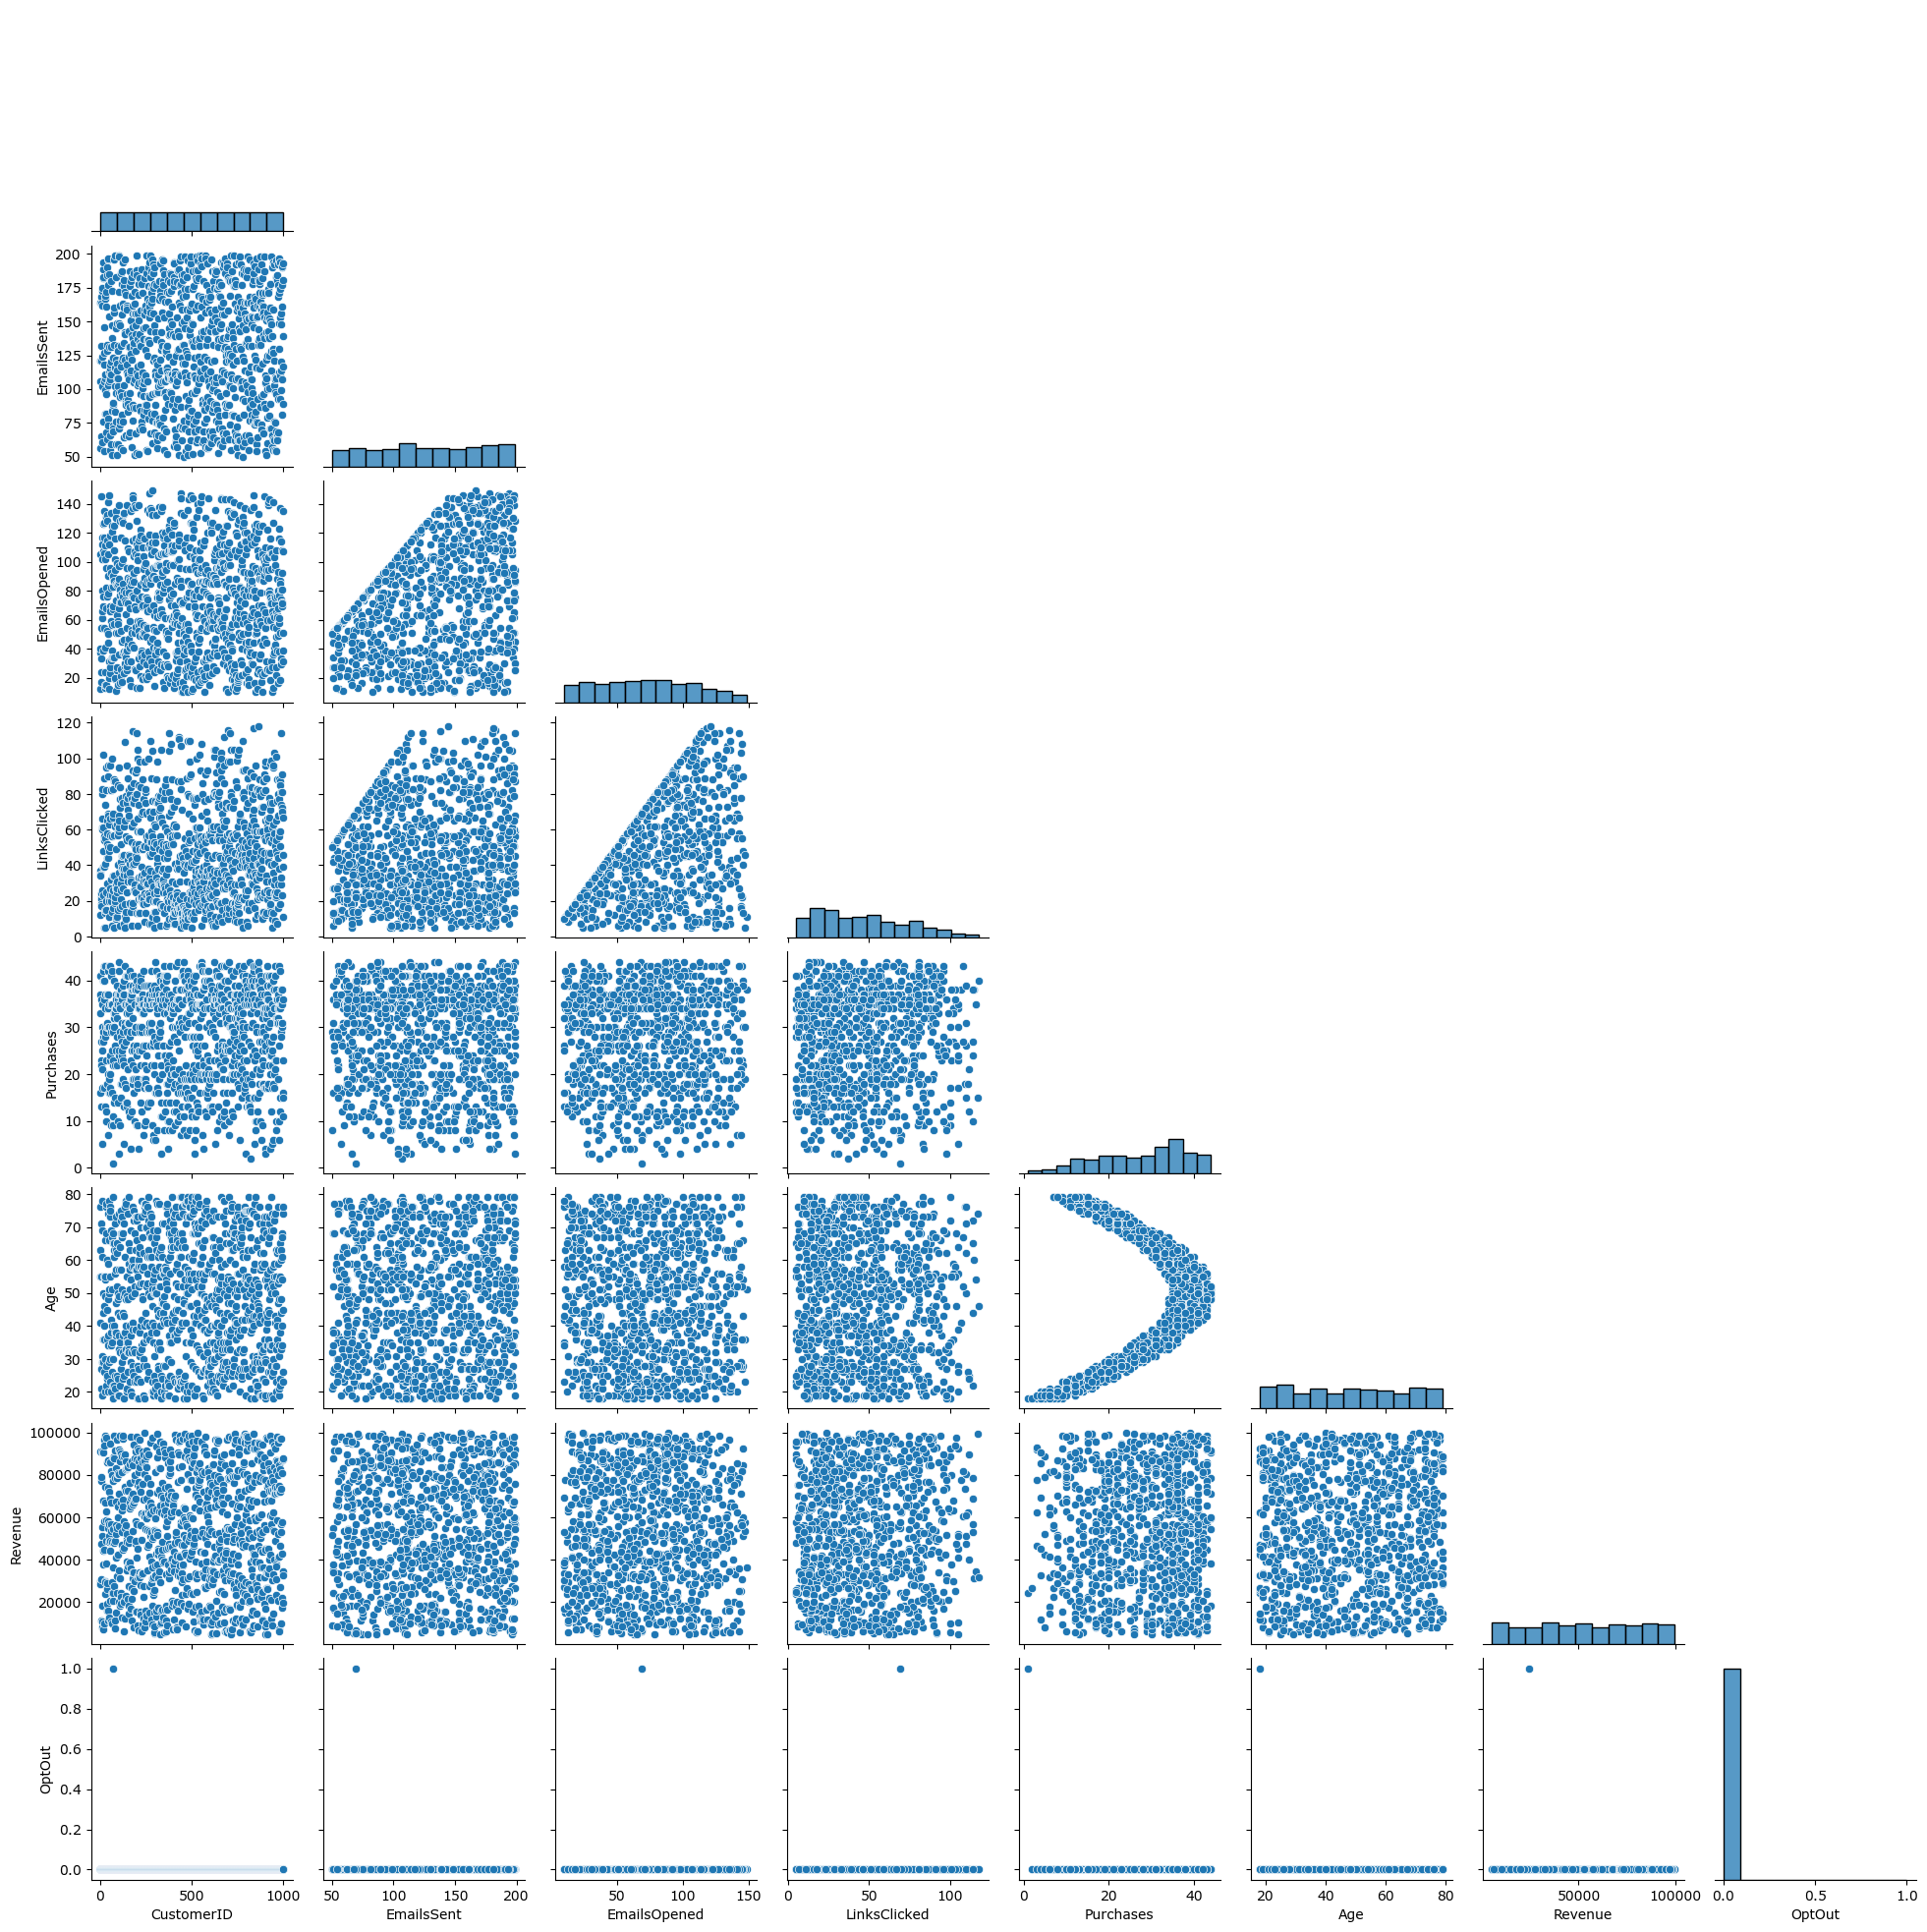

In [15]:
sns.pairplot(datac, corner='True')

ValueError: array must not contain infs or NaNs

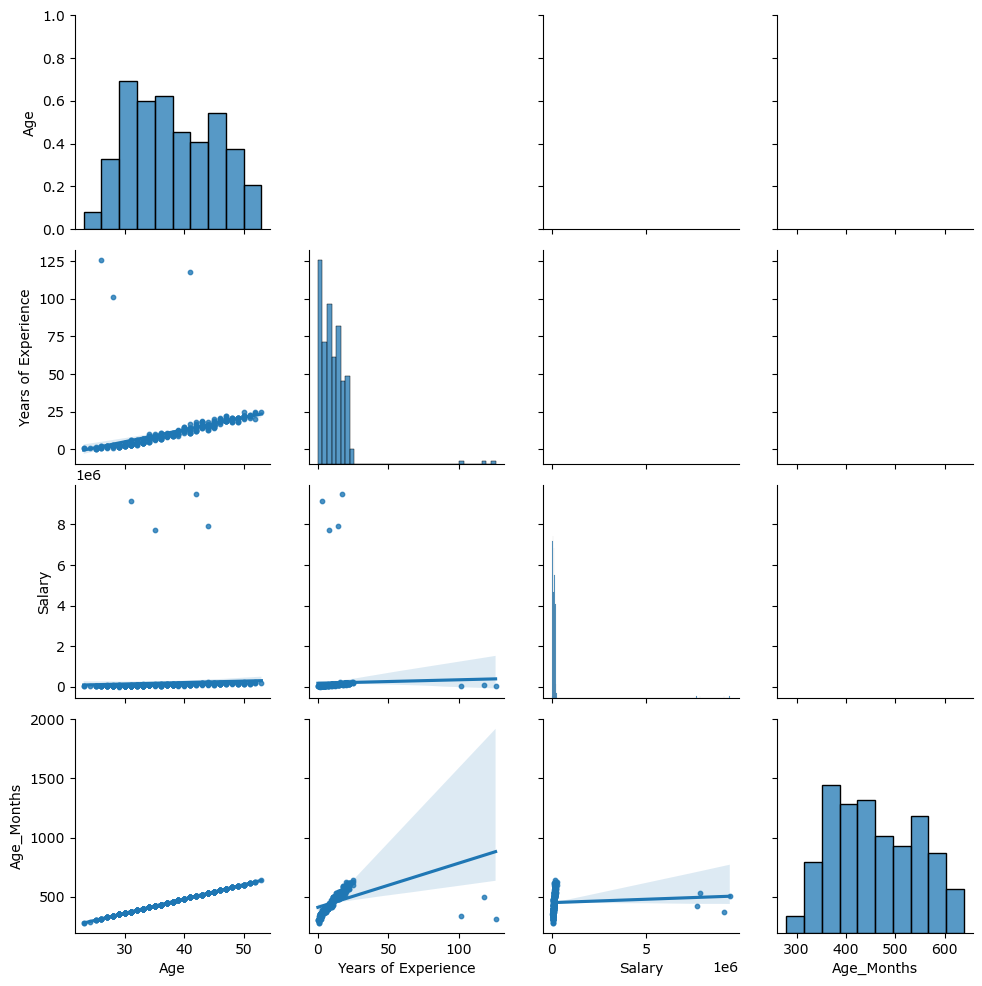

In [30]:
def corrfunc(x, y, **kwds):
    cmap = plt.get_cmap('coolwarm')
    norm = plt.Normalize(vmin=-1, vmax=1)
    ax = plt.gca()
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)
    r, _ = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3])) / 2
    ax.annotate(f"r={r:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
                color='white' if lightness < 0.7 else 'black', size=26, ha='center', va='center')

g = sns.PairGrid(datac)
g.map_lower(sns.regplot, scatter_kws={'s': 10})
g.map_diag(sns.histplot, kde=False)
g.map_upper(corrfunc, cmap=plt.get_cmap('coolwarm'), norm=plt.Normalize(vmin=-1, vmax=1))
g.fig.subplots_adjust(wspace=0.06, hspace=0.06)  # Equal spacing in both directions
plt.show()

### 3.2 - Categorical Bivariate Analysis

🔵 Features: Gender vs. Education Level

 * Chi-Square Test of Independence:
   - Chi-Square Value: 1.9811448406454049
   - p-value: 0.5763293723730791


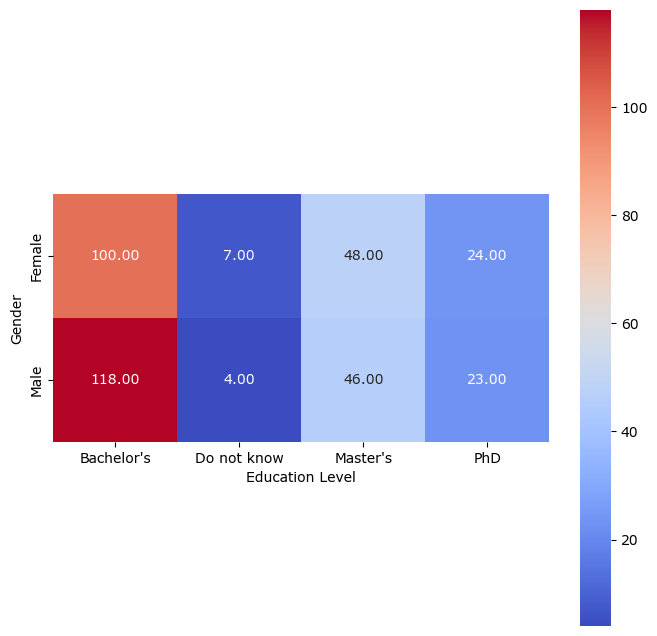


------------------------------




🔵 Features: Gender vs. Job Title

 * Chi-Square Test of Independence:
   - Chi-Square Value: 224.08576790497875
   - p-value: 0.004642003415742786


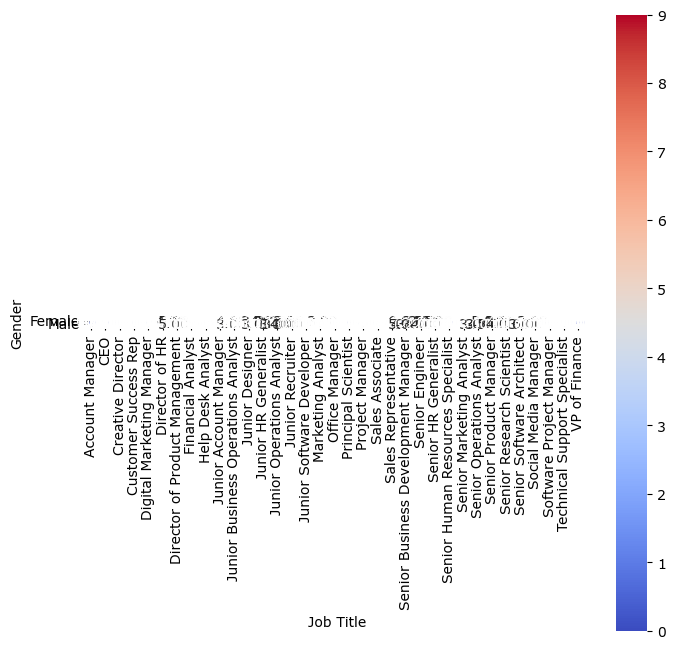


------------------------------




🔵 Features: Education Level vs. Gender

 * Chi-Square Test of Independence:
   - Chi-Square Value: 1.9811448406454049
   - p-value: 0.5763293723730791


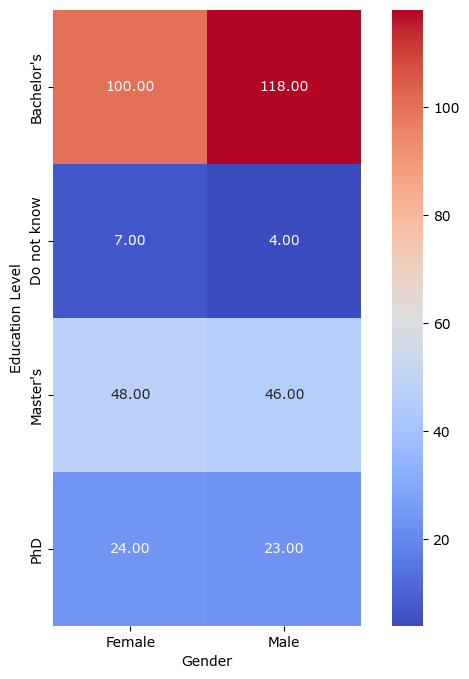


------------------------------




🔵 Features: Education Level vs. Job Title

 * Chi-Square Test of Independence:
   - Chi-Square Value: 757.1594727079705
   - p-value: 2.0614743919633237e-11


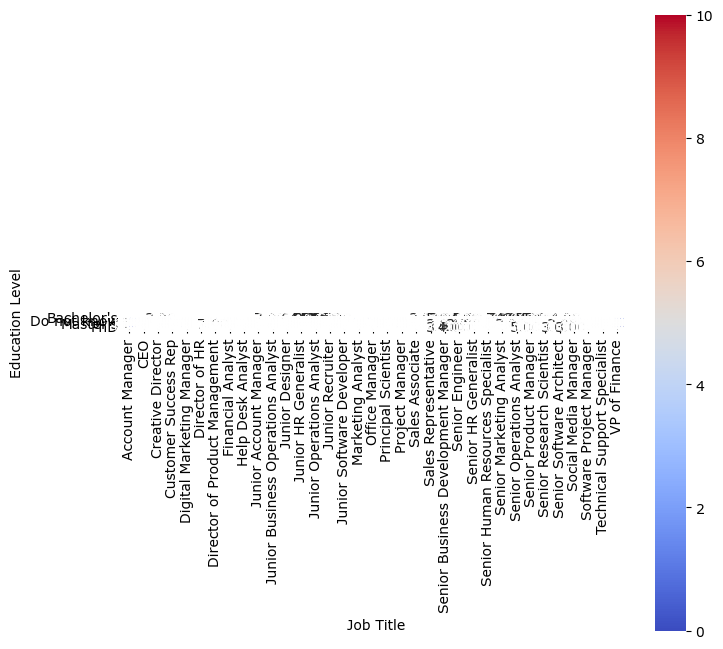


------------------------------




🔵 Features: Job Title vs. Gender

 * Chi-Square Test of Independence:
   - Chi-Square Value: 224.08576790497875
   - p-value: 0.004642003415742786


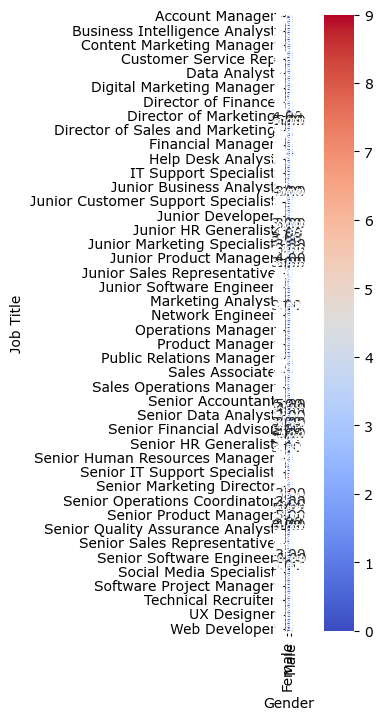


------------------------------




🔵 Features: Job Title vs. Education Level

 * Chi-Square Test of Independence:
   - Chi-Square Value: 757.1594727079705
   - p-value: 2.0614743919633237e-11


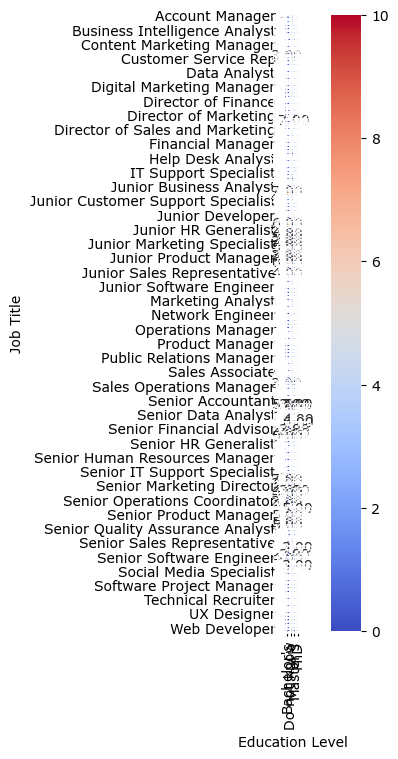


------------------------------




Finished! :D


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

categorical_features = datac.select_dtypes(include='object').columns

for c1 in categorical_features:
    for c2 in categorical_features:
        if c1 != c2:
            print(f"🔵 Features: {c1} vs. {c2}\n")

            # Create contingency table
            contingency_table = pd.crosstab(datac[c1], datac[c2])

            # Chi-Square Test of Independence
            chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
            print(" * Chi-Square Test of Independence:")
            print("   - Chi-Square Value:", chi2)
            print("   - p-value:", p_chi2)

            # Plot the contingency table
            plt.figure(figsize=(8, 8))
            sns.heatmap(contingency_table, cmap="coolwarm", square=True, annot=True, fmt=".2f")
            plt.xlabel(c2)
            plt.ylabel(c1)
            plt.show()

            print("\n------------------------------\n\n\n\n")

print("Finished! :D")

Text(0, 0.5, 'Purchases')

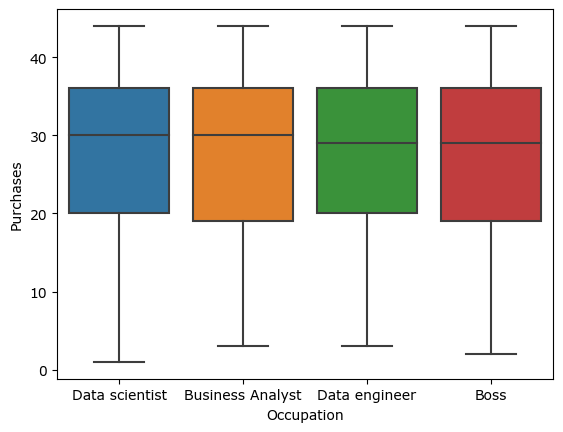

In [4]:
c1 = "Occupation"
c2 = "Purchases"

sns.boxplot(x=c1, y=c2, data=data)
plt.xlabel(c1)
plt.ylabel(c2)

#CLAIM CORRECT NO DROP